In [1271]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import re
import spacy
from datetime import datetime
import matplotlib.pyplot as plt
import  seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [1272]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk

In [1273]:
# Extract urls from their respective websites
TOI_url=[]
HT_url=[]
IE_url=[]
for i in range(1,4):
    TOI_url.append('https://timesofindia.indiatimes.com/mostread.cms?day=1{}{}'.format('&curpg=',i))# Times of India url
    HT_url.append('https://www.hindustantimes.com/world-news/{}{}'.format('page/?pageno=',i))# Hindustan Times Url
    IE_url.append('https://indianexpress.com/section/world/{}{}'.format('page/',i))# Indian Express url

In [1274]:
#parse date for the particular newspaper
dt=[]
for i in [23,24,25]:
    date='{}/04/2020'.format(i)
    d=datetime.strptime(str(date), "%d/%m/%Y")
    dt.append(d.strftime("%d-%m-%Y"))

In [1275]:
urls=[TOI_url,HT_url,IE_url]
parser=['lxml','html.parser','html.parser']


### Extracting news

In [1276]:

nlp=spacy.load('en_core_web_sm')
news=[]
scrap_len=0
for url in urls:
    if url==TOI_url:
        for Toi_url in url: 
            source=requests.get(Toi_url).content
            soup=BeautifulSoup(source,parser[scrap_len])
            headlines=soup.find_all('strong')
            articles=soup.find_all('art_synopsis')
            for headline,article in zip(headlines[1:],articles):
                entities=[(ent.text,ent.label_)for ent in nlp(article.text).ents]
                try:
                    news.append({'Headlines':headline.a['title'],
                                 'Date':dt[scrap_len],
                                 'Url':Toi_url,
                                 'Articles':article.text,
                                 'Website':'Times of India',
                                 'Channel':'World',
                                 'Entities':entities})
    
                except Exception as e:
                    pass
        scrap_len+=1
    
    if url==HT_url:
        for ht_url in url:
            source=requests.get(ht_url).content
            soup=BeautifulSoup(source,parser[scrap_len])
            headlines=soup.find_all('div',class_='media-heading headingfour')
            articles=soup.find_all('p') or soup.find_all('div',class_='para-txt')
            for headline,article in zip(headlines,articles):
                article=article.text
                article=re.sub('[\t\r\n]*','',str(article))
                article=re.sub('\sread\smore',' ',str(article))
                entities=[(ent.text,ent.label_)for ent in nlp(article).ents]
                try:
                    news.append({'Headlines':headline.a['title'],
                                 'Date':dt[scrap_len],
                                 'Url':ht_url,
                                 'Articles':article,
                                 'Website':'Hindustan Times',
                                 'Channel':'World',
                                 'Entities':entities})
                    
                except Exception as e:
                    pass
        scrap_len+=1
    
    if url==IE_url:
        for ie_url in url:
            source=requests.get(ie_url).content
            soup=BeautifulSoup(source,parser[scrap_len])
            headlines=soup.find_all('h2',class_='title')
            articles=soup.find_all('div',class_='articles')
            for headline,article in zip(headlines,articles):
                entities=[(ent.text,ent.label_)for ent in nlp(article.p.text).ents]
                try:

                    news.append({'Headlines':headline.a.text,
                                 'Date':dt[scrap_len],
                                 'Url':ie_url,
                                 'Articles':article.p.text,
                                 'Website':'Indian Epress',
                                 'Channel':'Business',
                                 'Entities':entities})
                except Exception as e:
                    pass

source=requests.get(TOI_url).content
soup=BeautifulSoup(source,'lxml')

In [1277]:
#import news dataset to csv
news_dataset=pd.DataFrame(news)

In [1278]:
news_dataset.to_csv('news.csv',index=False)

In [1282]:
#import onlinew news popularity dataset
data=pd.read_csv('OnlineNewsPopularity.csv')

In [1283]:
column_names=data.columns
columns=[]
for i in range(len(column_names)):
    col=re.sub('[\s]+','',str(column_names[i]))# remove extra spaces from coulmns
    columns.append(col)
    print('column',i+1,': ',column_names[i])
data.columns=columns

column 1 :  url
column 2 :   timedelta
column 3 :   n_tokens_title
column 4 :   n_tokens_content
column 5 :   n_unique_tokens
column 6 :   n_non_stop_words
column 7 :   n_non_stop_unique_tokens
column 8 :   num_hrefs
column 9 :   num_self_hrefs
column 10 :   num_imgs
column 11 :   num_videos
column 12 :   average_token_length
column 13 :   num_keywords
column 14 :   data_channel_is_lifestyle
column 15 :   data_channel_is_entertainment
column 16 :   data_channel_is_bus
column 17 :   data_channel_is_socmed
column 18 :   data_channel_is_tech
column 19 :   data_channel_is_world
column 20 :   kw_min_min
column 21 :   kw_max_min
column 22 :   kw_avg_min
column 23 :   kw_min_max
column 24 :   kw_max_max
column 25 :   kw_avg_max
column 26 :   kw_min_avg
column 27 :   kw_max_avg
column 28 :   kw_avg_avg
column 29 :   self_reference_min_shares
column 30 :   self_reference_max_shares
column 31 :   self_reference_avg_sharess
column 32 :   weekday_is_monday
column 33 :   weekday_is_tuesday
column 3

In [1041]:
# check the null values
data.isnull().sum()

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 61, dtype: int64

In [1042]:
data=data.drop(['url','timedelta','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords','kw_min_min','kw_max_min','kw_avg_min','kw_min_max','kw_max_max','kw_avg_max','kw_min_avg','kw_max_avg','kw_avg_avg','self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess','is_weekend','LDA_00','LDA_01','LDA_02','LDA_03','LDA_04','abs_title_subjectivity','abs_title_sentiment_polarity'],axis=1)

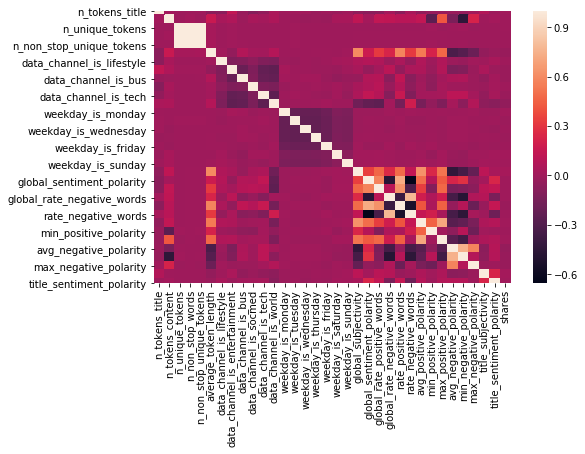

In [1043]:
#finding the correlation with respect to target(shares)
correlation=data.corr()
fig = plt.figure(figsize = (8,5))
sns.heatmap(correlation)

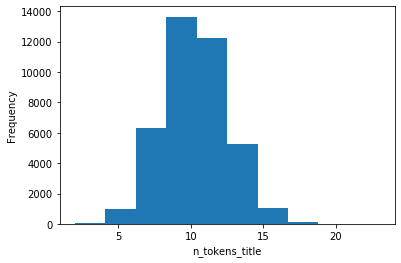

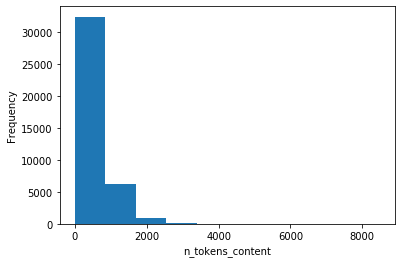

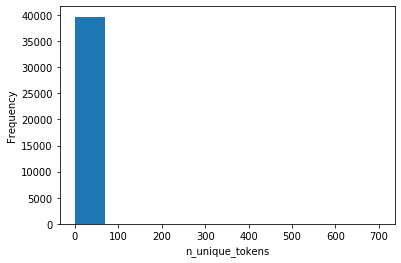

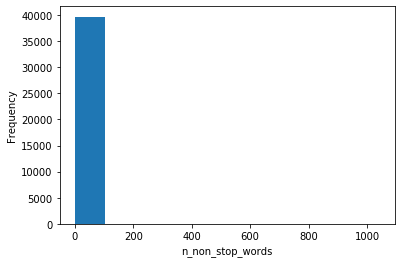

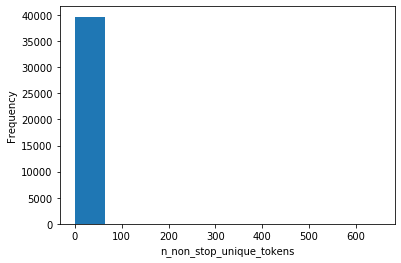

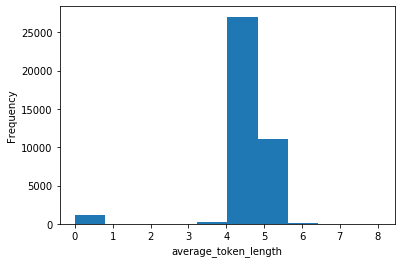

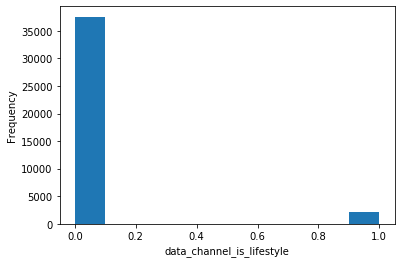

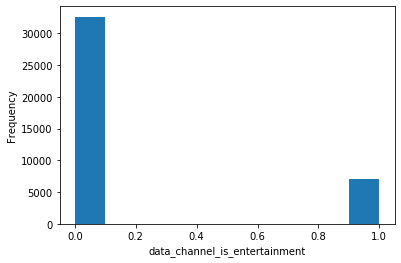

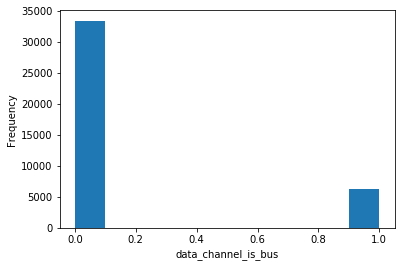

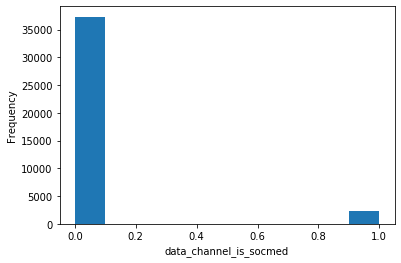

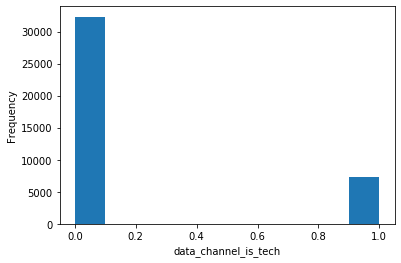

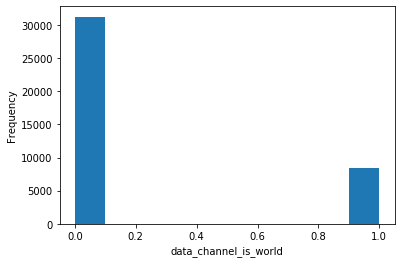

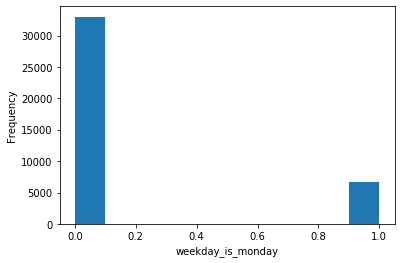

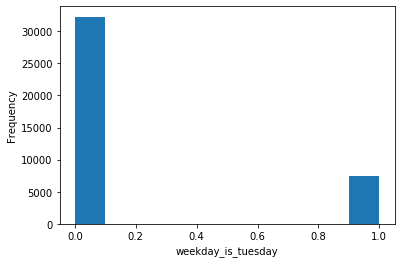

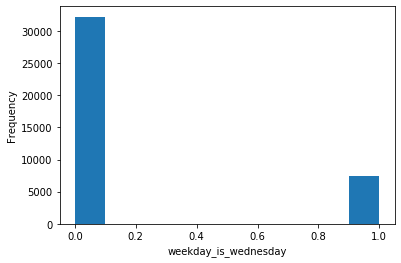

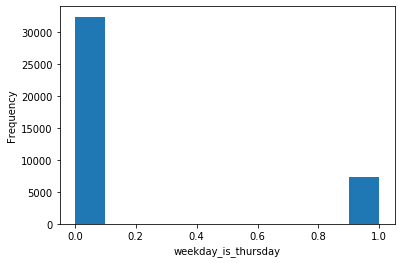

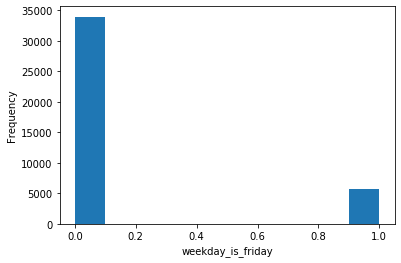

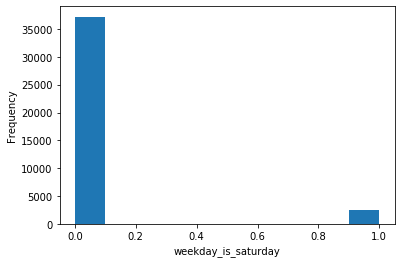

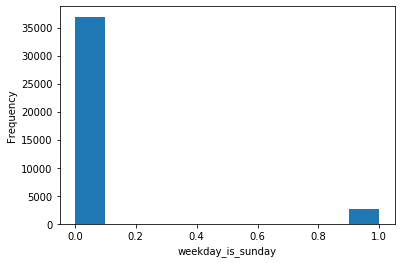

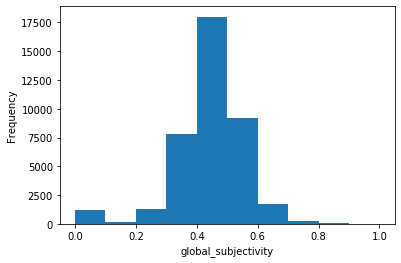

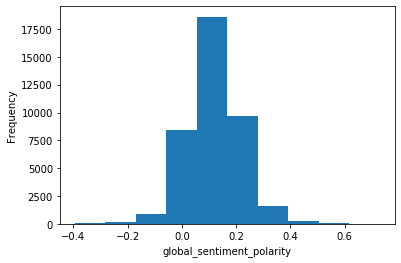

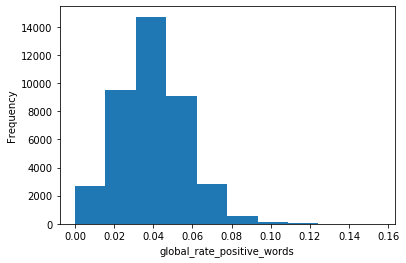

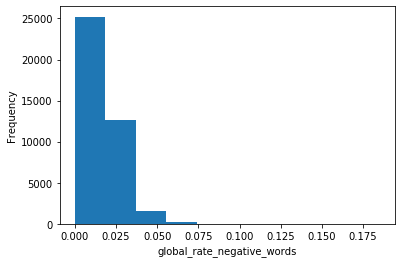

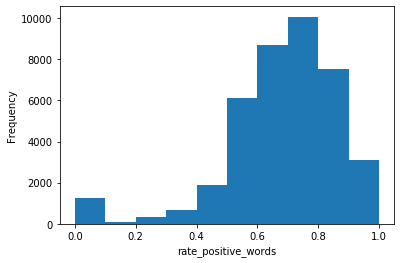

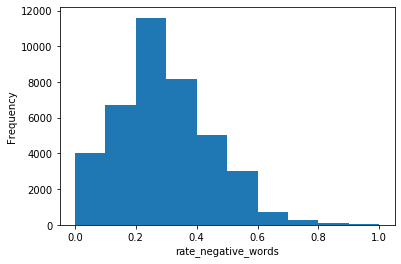

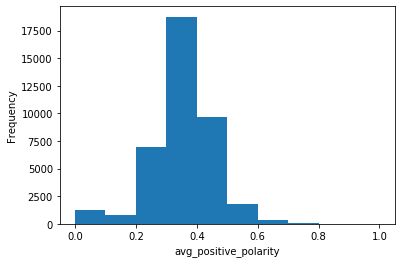

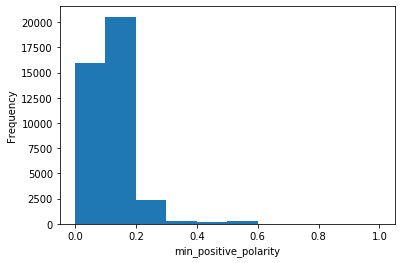

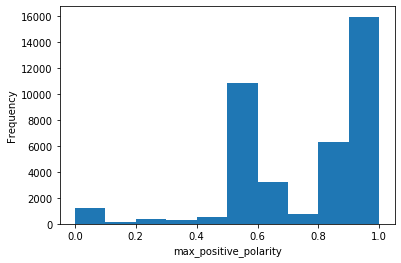

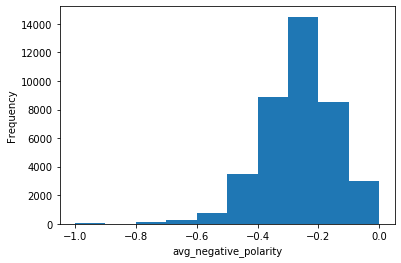

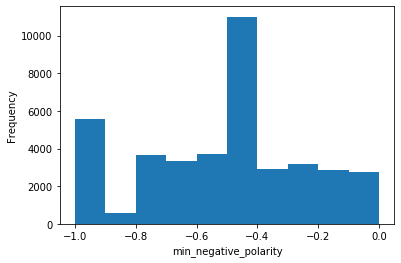

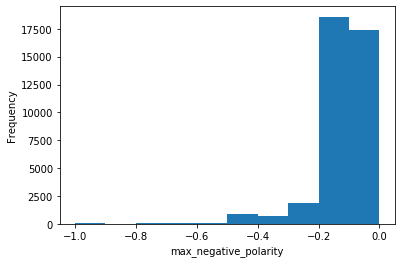

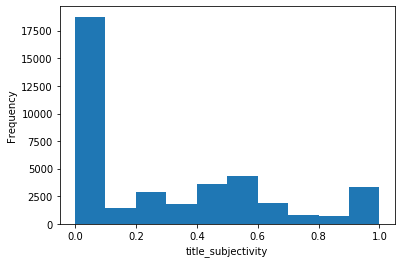

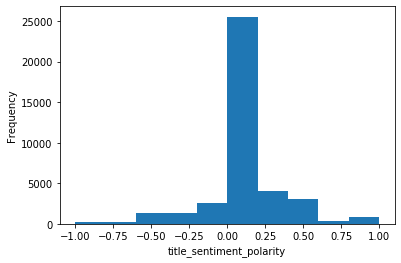

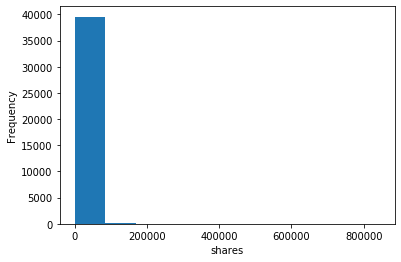

In [1044]:
# histogram plot of numerical data
for x in data.columns:
    data[x].plot(kind='hist')
    plt.xlabel(x)
    plt.show()

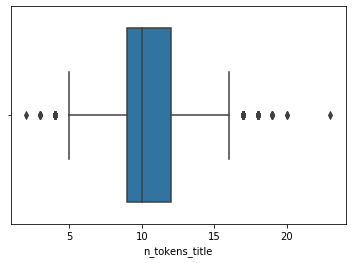

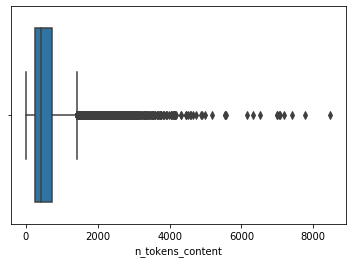

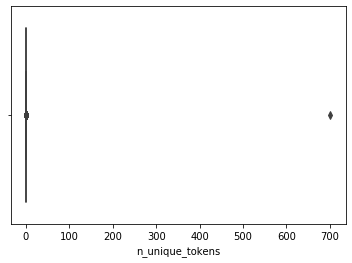

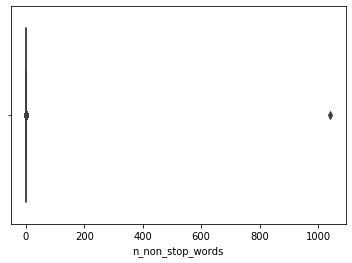

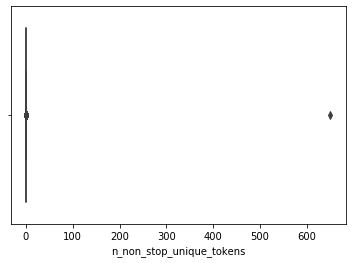

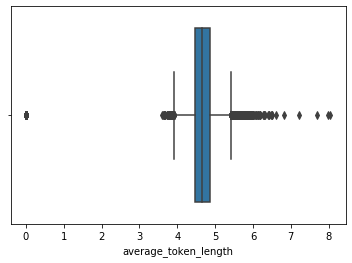

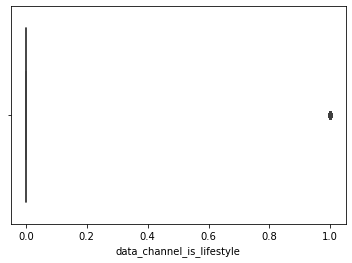

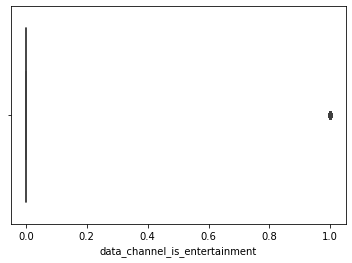

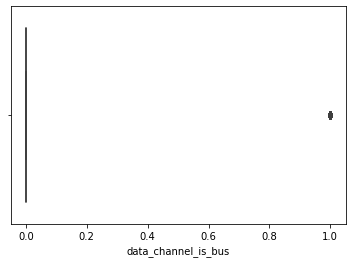

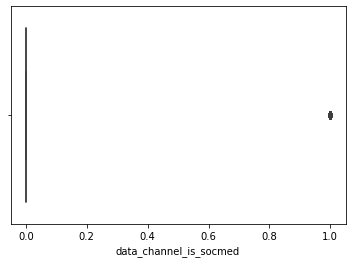

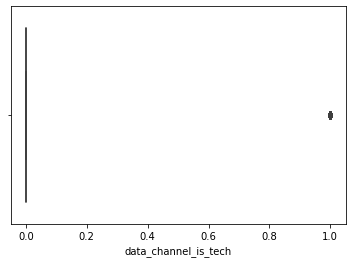

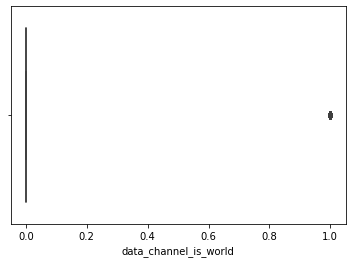

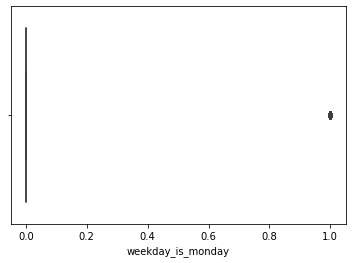

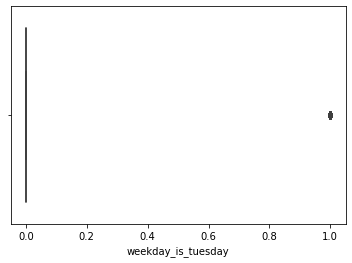

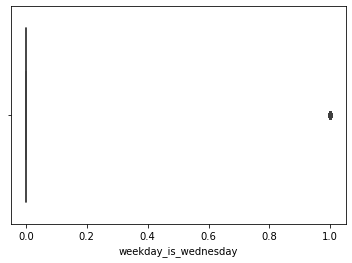

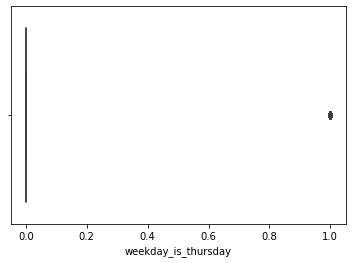

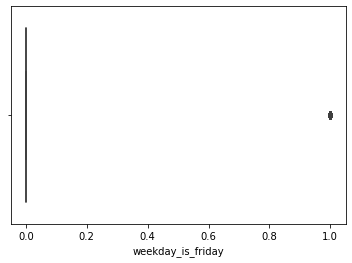

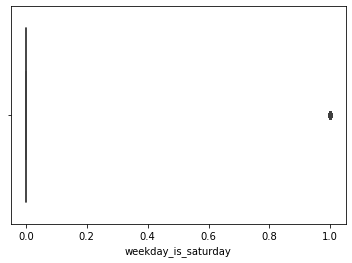

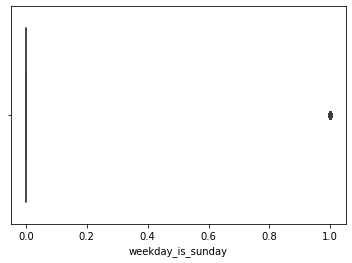

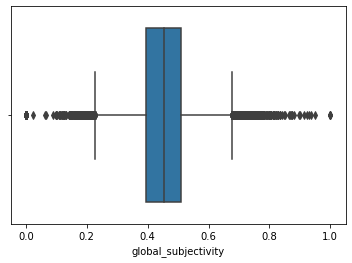

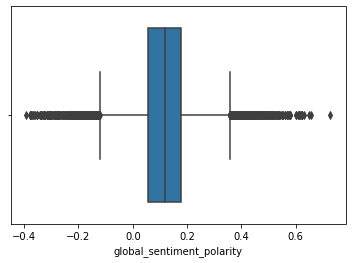

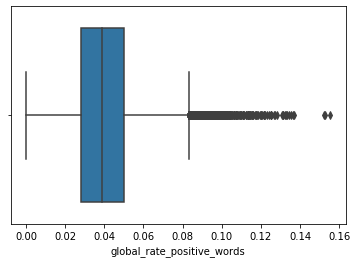

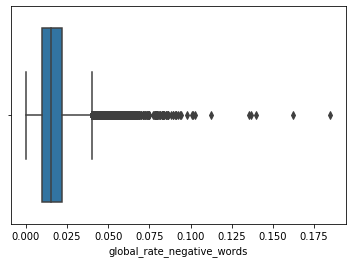

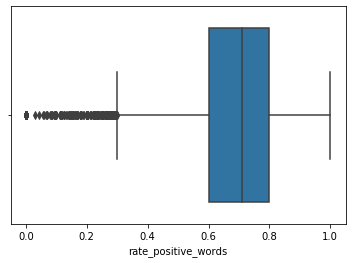

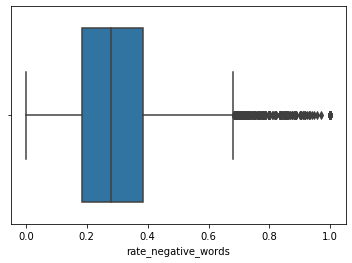

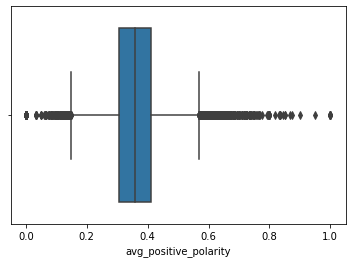

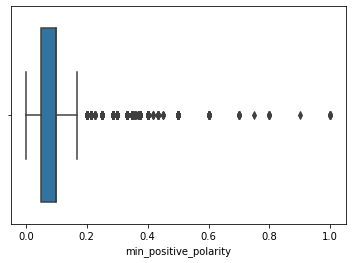

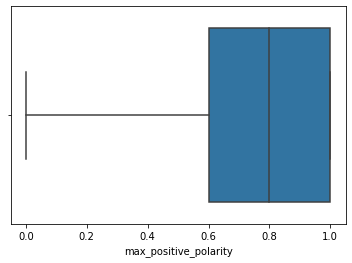

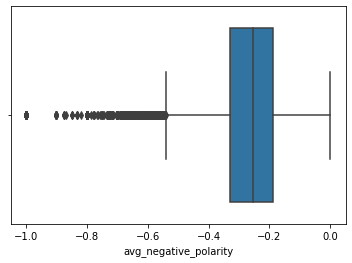

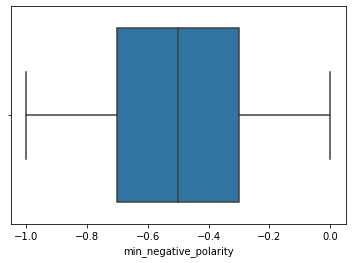

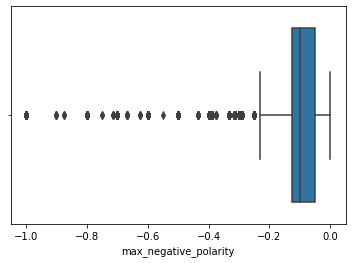

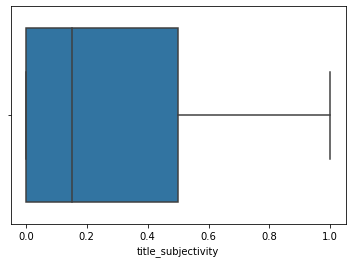

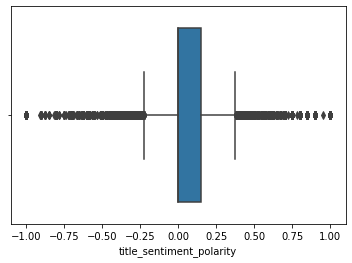

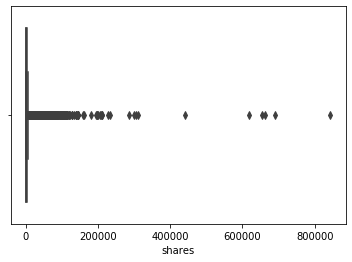

In [1045]:
# box plot of numerical_data
for x in data.columns:
    sns.boxplot(data[x])
    plt.xlabel(x)
    plt.show()

In [1046]:
#remove outliers
q1=data.shares.describe()['25%']
q2=data.shares.describe()['75%']
iqr=q2-q1 # inter quartile range
left_bound=q1-(iqr)*3
right_bound=q2+(iqr)*3
index=np.where(data.shares>=right_bound)[0]
# remove outliers from the dataset
data.drop(index=index)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.680365,0.0,1.0,0.0,0.0,...,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,4.913725,0.0,0.0,1.0,0.0,...,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,4.393365,0.0,0.0,1.0,0.0,...,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,4.404896,0.0,1.0,0.0,0.0,...,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,4.682836,0.0,0.0,0.0,0.0,...,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,4.523121,0.0,0.0,0.0,0.0,...,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,1800
39640,12.0,328.0,0.696296,1.0,0.885057,4.405488,0.0,0.0,0.0,1.0,...,0.187500,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,1900
39641,10.0,442.0,0.516355,1.0,0.644128,5.076923,0.0,0.0,0.0,0.0,...,0.423077,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,1900
39642,6.0,682.0,0.539493,1.0,0.692661,4.975073,0.0,0.0,0.0,0.0,...,0.533333,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,1100


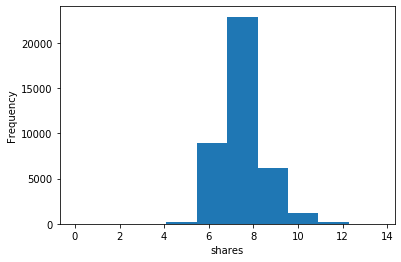

In [1047]:
#normailizing the target variable
data.shares=np.log(data.shares)
data.shares.plot(kind='hist')
plt.xlabel(x)
plt.show()

In [1048]:
train_data=data.iloc[:,data.columns!='shares']
test_data=data.shares

In [1049]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(train_data.shape[0], kernel_initializer='he_uniform',input_dim = train_data.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))
# Compile the network :
optimizer=Adam(lr=1e-8)
NN_model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
NN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 39644)             1347896   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               10149120  
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 11,554,745
Trainable params: 11,554,745
Non-trainable params: 0
__________________________________________

In [1051]:
history =NN_model.fit(train_data,test_data, epochs=100, callbacks=[lr_schedule],validation_split = 0.2,verbose=1)

Train on 31715 samples, validate on 7929 samples
Epoch 1/100
31715/31715 [==============================] - 166s 5ms/step - loss: 1816.1565 - mae: 35.3984 - val_loss: 1547.8824 - val_mae: 33.1685
Epoch 2/100
31715/31715 [==============================] - 175s 6ms/step - loss: 1287.4619 - mae: 30.2860 - val_loss: 1054.4843 - val_mae: 27.8646
Epoch 3/100
31715/31715 [==============================] - 183s 6ms/step - loss: 844.4462 - mae: 25.0416 - val_loss: 654.6880 - val_mae: 22.5193
Epoch 4/100
31715/31715 [==============================] - 163s 5ms/step - loss: 496.1933 - mae: 19.7847 - val_loss: 341.8488 - val_mae: 16.9038
Epoch 5/100
31715/31715 [==============================] - 162s 5ms/step - loss: 219.2458 - mae: 13.7829 - val_loss: 128.9355 - val_mae: 11.0282
Epoch 6/100
31715/31715 [==============================] - 161s 5ms/step - loss: 83.0658 - mae: 8.8913 - val_loss: 47.5434 - val_mae: 6.7749
Epoch 7/100
31715/31715 [==============================] - 162s 5ms/step - loss: 

Epoch 59/100
31715/31715 [==============================] - 161s 5ms/step - loss: 1.5281 - mae: 0.8849 - val_loss: 3.1119 - val_mae: 1.4044
Epoch 60/100
31715/31715 [==============================] - 160s 5ms/step - loss: 2.4575 - mae: 1.0539 - val_loss: 1.1203 - val_mae: 0.8139
Epoch 61/100
31715/31715 [==============================] - 159s 5ms/step - loss: 3.0488 - mae: 1.0615 - val_loss: 2.3979 - val_mae: 1.2628
Epoch 62/100
31715/31715 [==============================] - 159s 5ms/step - loss: 2.4679 - mae: 1.0603 - val_loss: 1.1384 - val_mae: 0.8256
Epoch 63/100
31715/31715 [==============================] - 162s 5ms/step - loss: 2.2616 - mae: 1.0330 - val_loss: 1.1390 - val_mae: 0.8124
Epoch 64/100
31715/31715 [==============================] - 162s 5ms/step - loss: 2.5963 - mae: 1.0916 - val_loss: 7.4046 - val_mae: 2.1345
Epoch 65/100
31715/31715 [==============================] - 161s 5ms/step - loss: 2.3984 - mae: 1.0661 - val_loss: 1.2880 - val_mae: 0.8714
Epoch 66/100
31715/3

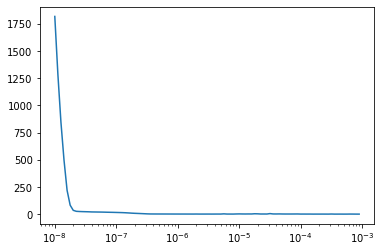

In [1052]:
# plotiing loss per epoch
plt.semilogx(history.history["lr"], history.history["loss"])

<Figure size 432x288 with 0 Axes>

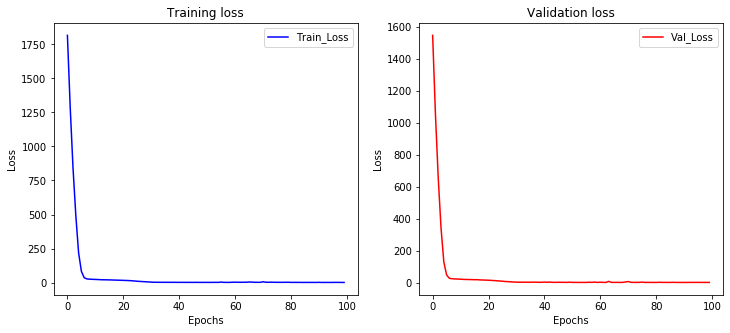

<Figure size 432x288 with 0 Axes>

In [1053]:
val_loss=history.history['val_loss']
train_loss=history.history['loss']
epochs=range(len(loss)) # Get number of epochs

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.plot(epochs, train_loss, 'b')
ax2.plot(epochs, val_loss, 'r')
ax1.title.set_text('Training loss')
ax2.title.set_text('Validation loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend(["Train_Loss"])
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["Val_Loss"])

plt.figure()




In [1054]:
#final_network
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(train_data.shape[0], kernel_initializer='he_uniform',input_dim = train_data.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
optimizer=Adam(lr=1e-6)
NN_model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
NN_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 39644)             1347896   
_________________________________________________________________
dense_20 (Dense)             (None, 256)               10149120  
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total params: 11,554,745
Trainable params: 11,554,745
Non-trainable params: 0
__________________________________________

In [1055]:
#fi final model
history2 =NN_model.fit(train_data,test_data, epochs=100,verbose=1)

Epoch 1/100
39644/39644 [==============================] - 197s 5ms/step - loss: 27.2422 - mae: 3.8198
Epoch 2/100
39644/39644 [==============================] - 197s 5ms/step - loss: 7.4248 - mae: 2.2035
Epoch 3/100
39644/39644 [==============================] - 196s 5ms/step - loss: 3.0063 - mae: 1.3481
Epoch 4/100
39644/39644 [==============================] - 196s 5ms/step - loss: 2.3271 - mae: 1.1916
Epoch 5/100
39644/39644 [==============================] - 197s 5ms/step - loss: 2.2093 - mae: 1.1562
Epoch 6/100
39644/39644 [==============================] - 197s 5ms/step - loss: 2.0526 - mae: 1.1120
Epoch 7/100
39644/39644 [==============================] - 197s 5ms/step - loss: 1.8945 - mae: 1.0697
Epoch 8/100
39644/39644 [==============================] - 197s 5ms/step - loss: 1.8025 - mae: 1.0395
Epoch 9/100
39644/39644 [==============================] - 197s 5ms/step - loss: 1.6875 - mae: 1.0035
Epoch 10/100
39644/39644 [==============================] - 197s 5ms/step - loss:

39644/39644 [==============================] - 196s 5ms/step - loss: 1.0186 - mae: 0.7528
Epoch 81/100
39644/39644 [==============================] - 196s 5ms/step - loss: 1.0360 - mae: 0.7593
Epoch 82/100
39644/39644 [==============================] - 196s 5ms/step - loss: 1.0503 - mae: 0.7650
Epoch 83/100
39644/39644 [==============================] - 196s 5ms/step - loss: 1.0248 - mae: 0.7548
Epoch 84/100
39644/39644 [==============================] - 196s 5ms/step - loss: 1.0616 - mae: 0.7706
Epoch 85/100
39644/39644 [==============================] - 207s 5ms/step - loss: 1.0483 - mae: 0.7643
Epoch 86/100
39644/39644 [==============================] - 197s 5ms/step - loss: 1.0357 - mae: 0.7565
Epoch 87/100
39644/39644 [==============================] - 198s 5ms/step - loss: 1.0122 - mae: 0.7504
Epoch 88/100
39644/39644 [==============================] - 198s 5ms/step - loss: 1.0505 - mae: 0.7634
Epoch 89/100
39644/39644 [==============================] - 197s 5ms/step - loss: 0.99

<Figure size 432x288 with 0 Axes>

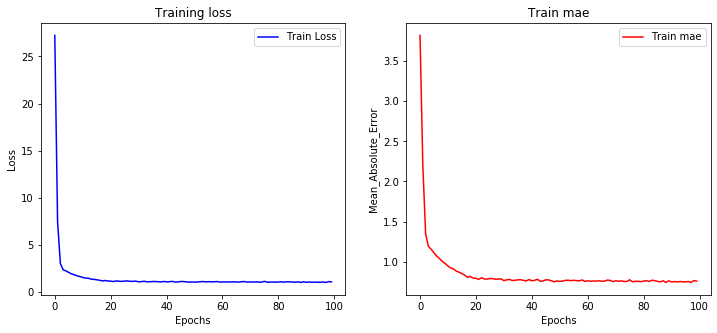

<Figure size 432x288 with 0 Axes>

In [1239]:
train_mae=history2.history['mae']
train_loss=history2.history['loss']
epochs=range(len(loss)) # Get number of epochs

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.plot(epochs, train_loss, 'b')
ax2.plot(epochs, train_mae, 'r')
ax1.title.set_text('Training loss')
ax2.title.set_text('Train mae')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend(["Train Loss"])
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Mean_Absolute_Error")
ax2.legend(["Train mae"])

plt.figure()




In [1243]:
# read news data
news_data=pd.read_csv('news.csv')

In [1244]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [1245]:
lemmatizer = WordNetLemmatizer()
def preprocessing(articles):
    articles=re.sub('(\d:\d\d\s)(am|pm|)','',str(articles),flags=re.I)# remove time 
    articles = articles.lower() # remove upper case
    articles = re.sub('[^a-zA-Z]',' ', str(articles)) # take alphabet only
    articles = re.sub('[\s]+', ' ', str(articles) ) #Remove additional white spaces
    articles = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(articles)])
    articles = articles.strip(' ')#remove white spaces from the front and end of a string
    return str(articles)
    

In [1246]:
article_list=[]
headline_list=[]
for article in news_data.Articles:
    article_list.append(preprocessing(article))
for headline in news_data.Headlines:
    headline_list.append(preprocessing(headline))
news_data.Articles = article_list
news_data.Headlines=headline_list

In [1247]:
news_data

,Headlines,Date,Url,Articles,Website,Channel,Entities
0,covid government guideline on ac cooler and fan,23-04-2020,https://timesofindia.indiatimes.com/mostread.c...,accoding to the guideline compile by the india...,Times of India,World,[('the Indian Society of Heating Refrigerating...
1,centre give clearance for neighbourhood shop t...,23-04-2020,https://timesofindia.indiatimes.com/mostread.c...,the home ministry on friday permit all shop in...,Times of India,World,"[('Friday', 'DATE')]"
2,islamophobia row pm modi jaishankar dial gulf ...,23-04-2020,https://timesofindia.indiatimes.com/mostread.c...,india have mount a diplomatic offensive in the...,Times of India,World,"[('India', 'GPE'), ('the Gulf Arab', 'LOC'), (..."
3,mha order on shop what s open what s close,23-04-2020,https://timesofindia.indiatimes.com/mostread.c...,in rural area all shop except those in shoppin...,Times of India,World,[]
4,a month of lockdown covid growth fall from to,23-04-2020,https://timesofindia.indiatimes.com/mostread.c...,when pm modi announce a total lockdown of the ...,Times of India,World,"[('PM Modi', 'ORG'), ('a month ago', 'DATE'), ..."
...,...,...,...,...,...,...,...
175,covid africa could slide into severe hunger cr...,25-04-2020,https://indianexpress.com/section/world/page/3,measure put in place to curb the coronavirus p...,Indian Epress,Business,"[('millions', 'CARDINAL'), ('Africa', 'LOC'), ..."
176,million have sought u jobless aid since virus hit,25-04-2020,https://indianexpress.com/section/world/page/3,economist be forecasting a many a million job ...,Indian Epress,Business,"[('as many as 25 million', 'CARDINAL'), ('Apri..."
177,merkel call for international cooperation agai...,25-04-2020,https://indianexpress.com/section/world/page/3,it go without say that when medication or a va...,Indian Epress,Business,"[('Angela Merkel', 'PERSON')]"
178,too poor to buy too scar to meet palestinian f...,25-04-2020,https://indianexpress.com/section/world/page/3,the holy fast month be expect to start on frid...,Indian Epress,Business,"[('The holy fasting month', 'DATE'), ('Friday'..."


In [1248]:
stop_words = set(stopwords.words('english')) 

def cal_count(content,title):
    
    # Number of words in the content
    n_tokens_content=word_tokenize(text=str(content))
    n_tokens_content=len(n_tokens_content)
    # Number of words in the title
    n_tokens_title=word_tokenize(text=str(title))
    n_tokens_title=len(n_tokens_title)
    # Rate of unique word in the content
    unique_array=np.asarray(word_tokenize(text=str(content)))
    n_unique_tokens=round((np.unique(unique_array).shape[0])/n_tokens_content,9)
    # Rate of non-stop words in the content
    non_stop_words=[word for word in word_tokenize(text=str(content)) if word not in stop_words]
    n_non_stop_words=len(non_stop_words)/n_tokens_content
    # Rate of unique non-stop words in the content
    unique_non_stop_array=np.array(non_stop_words)
    n_non_stop_unique_tokens=np.unique(unique_non_stop_array).shape[0]/len(non_stop_words)
    # Average length of the words in the content
    token_length=[len(word)for word in word_tokenize(text=str(content))]
    average_token_length=np.asarray(token_length).sum()/len(token_length)
    
    return n_tokens_content,n_tokens_title,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length

In [1249]:
def channel(channel):
    if 'lifestyle' in channel:
        data_channel_is_lifestyle=1
    else:
        data_channel_is_lifestyle=0
        
    if 'Entertainment' in channel:
        data_channel_is_Entertainment=1
    else:
        data_channel_is_Entertainment=0
        
    if 'Business' in channel:
        data_channel_is_bus=1
    else:
        data_channel_is_bus=0
        
    if 'socialMedia' in channel:
        data_channel_is_socmd=1
    else:
        data_channel_is_socmd=0
        
    if 'Tech' in channel:
        data_channel_is_tech=1
    else:
        data_channel_is_tech=0
    
    if 'World' in channel:
        data_channel_is_world=1
    else:
        data_channel_is_world=0
    
        
    return data_channel_is_lifestyle,data_channel_is_Entertainment,data_channel_is_bus,data_channel_is_socmd,data_channel_is_tech,data_channel_is_world
            

In [1250]:
def weekday_count(days):
    days=datetime.strptime(str(days), "%d-%m-%Y")
    days=days.strftime("%A")

    if 'Monday' in days:
        weekday_is_monday=1
    else:
        weekday_is_monday=0
    
    if 'Tuesday' in days:
        weekday_is_tuesday=1
    else:
        weekday_is_tuesday=0
    
    if 'Wednesday' in days:
        weekday_is_wednesday=1
    else:
        weekday_is_wednesday=0
    
    if 'Thursday' in days:
        weekday_is_thursday=1
    else:
        weekday_is_thursday=0
    
    if 'Friday' in days:
        weekday_is_friday=1
    else:
        weekday_is_friday=0
    
    if 'saturday' in days:
        weekday_is_saturday=1
    else:
        weekday_is_saturday=0
    
    if 'Sunday' in days:
        weekday_is_sunday=1
    else:
        weekday_is_sunday=0
    return weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday

In [1251]:
def polarity(title,content):
    # Text Subjectivity
    global_subjectivity=TextBlob(content).sentiment.subjectivity
    # Text sentiment polarity
    global_sentiment_polarity=TextBlob(content).sentiment.polarity  
    # Rate of positive words in the content
    positive_words=[word for word in word_tokenize(content) if TextBlob(word).sentiment.polarity>0.1]
    global_rate_positive_words=len(positive_words)/len(word_tokenize(content))
    # Rate of negative words in the content
    negative_words=[word for word in word_tokenize(content) if TextBlob(word).sentiment.polarity<-0.1]
    global_rate_negative_words=len(negative_words)/len(word_tokenize(content))
    # Rate of poitive words among non-neutral token
    non_neutral_words=[word for word in word_tokenize(content) if TextBlob(word).sentiment.polarity<-0.1 or TextBlob(word).sentiment.polarity>0.1]
    # Average polarity of positive words
    positive_polarity=[TextBlob(word).sentiment.polarity for word in positive_words]
    # Average polarity of negative words
    negative_polarity=[TextBlob(word).sentiment.polarity for word in negative_words]
    # Title subjectivity
    title_subjectivity=TextBlob(title).sentiment.subjectivity
    # Title polarity
    title_sentiment_polarity=TextBlob(title).sentiment.polarity
    
    
    try:
        rate_positive_words=len(positive_words)/len(non_neutral_words)
        # Rate rate of negative words among non-neutral token
        rate_negative_words=len(negative_words)/len(non_neutral_words)
        # Average polarity of positive words
        avg_positive_polarity=np.average(positive_polarity)
        # Average polarity of negative words
        avg_negative_polarity=np.average(negative_polarity)
        # maximum polarity of positive words
        max_positive_polarity=np.asarray(positive_polarity).max()
        # Minimum polarity of positivewords
        min_positive_polarity=np.asarray(positive_polarity).min()
        # maximum polarity of negative words
        max_negative_polarity=np.asarray(negative_polarity).max()
        # Minimum polarity of positivewords
        min_negative_polarity=np.asarray(negative_polarity).min()
    except:
        rate_positive_words=0
        rate_negative_words=0
        avg_positive_polarity=0
        avg_negative_polarity=0
        max_positive_polarity=0
        max_negative_polarity=0
        min_negative_polarity=0
        min_positive_polarity=0
    return global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity

In [1252]:
nn_count=[]
polarity_count=[]
channel_list=[]
weekdays_list=[]
# count articles and title
for article,headline in zip(news_data.Articles,news_data.Headlines):
    nn_count.append(cal_count(article,headline))
# checking for each channel
for x in news_data.Channel:
    channel_list.append(channel(x))
# checking for each date 
for x in news_data.Date:
    weekdays_list.append(weekday_count(x))
# calculate polarity
for article,headline in zip(news_data.Articles,news_data.Headlines):
    polarity_count.append(polarity(article,headline))



C:\Users\Asus\Miniconda3\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Asus\Miniconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [1253]:
# concat news data and article count
news_data=pd.concat([news_data,pd.DataFrame(nn_count,columns=['n_tokens_content','n_tokens_title','n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens','average_token_length'])],axis=1)
# concat news data and channel count
news_data=pd.concat([news_data,pd.DataFrame(channel_list,columns=['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world'])],axis=1)
# concat news data and week days
news_data=pd.concat([news_data,pd.DataFrame(weekdays_list,columns=['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday'])],axis=1)
# concat news data and polarity count
news_data=pd.concat([news_data,pd.DataFrame(polarity_count,columns=['global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words','rate_positive_words','rate_negative_words','avg_positive_polarity','min_positive_polarity','max_positive_polarity','avg_negative_polarity','min_negative_polarity','max_negative_polarity','title_subjectivity','title_sentiment_polarity'])],axis=1)


In [1254]:
news_data

,Headlines,Date,Url,Articles,Website,Channel,Entities,n_tokens_content,n_tokens_title,n_unique_tokens,...,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity
0,covid government guideline on ac cooler and fan,23-04-2020,https://timesofindia.indiatimes.com/mostread.c...,accoding to the guideline compile by the india...,Times of India,World,[('the Indian Society of Heating Refrigerating...,54,8,0.777778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.416667,0.350000
1,centre give clearance for neighbourhood shop t...,23-04-2020,https://timesofindia.indiatimes.com/mostread.c...,the home ministry on friday permit all shop in...,Times of India,World,"[('Friday', 'DATE')]",53,8,0.754717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312857,-0.134286
2,islamophobia row pm modi jaishankar dial gulf ...,23-04-2020,https://timesofindia.indiatimes.com/mostread.c...,india have mount a diplomatic offensive in the...,Times of India,World,"[('India', 'GPE'), ('the Gulf Arab', 'LOC'), (...",47,8,0.851064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.432937,-0.142460
3,mha order on shop what s open what s close,23-04-2020,https://timesofindia.indiatimes.com/mostread.c...,in rural area all shop except those in shoppin...,Times of India,World,[],57,10,0.649123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.408333,0.030556
4,a month of lockdown covid growth fall from to,23-04-2020,https://timesofindia.indiatimes.com/mostread.c...,when pm modi announce a total lockdown of the ...,Times of India,World,"[('PM Modi', 'ORG'), ('a month ago', 'DATE'), ...",65,9,0.738462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.297222,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,covid africa could slide into severe hunger cr...,25-04-2020,https://indianexpress.com/section/world/page/3,measure put in place to curb the coronavirus p...,Indian Epress,Business,"[('millions', 'CARDINAL'), ('Africa', 'LOC'), ...",32,11,0.843750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
176,million have sought u jobless aid since virus hit,25-04-2020,https://indianexpress.com/section/world/page/3,economist be forecasting a many a million job ...,Indian Epress,Business,"[('as many as 25 million', 'CARDINAL'), ('Apri...",26,9,0.769231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.464286,0.357143
177,merkel call for international cooperation agai...,25-04-2020,https://indianexpress.com/section/world/page/3,it go without say that when medication or a va...,Indian Epress,Business,"[('Angela Merkel', 'PERSON')]",36,7,0.777778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.433333,0.266667
178,too poor to buy too scar to meet palestinian f...,25-04-2020,https://indianexpress.com/section/world/page/3,the holy fast month be expect to start on frid...,Indian Epress,Business,"[('The holy fasting month', 'DATE'), ('Friday'...",36,12,0.888889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.426190,0.054762


In [1255]:
news_data.drop(['Url','Entities','Headlines','Date','Articles','Website','Channel'],axis=1,inplace=True)

In [1265]:
# popularity predict parsed article 
predicted_virality=NN_model.predict(news_data)

In [1266]:
predicted_virality=np.exp(predicted_virality).astype('int64').flatten()
predicted_virality=predicted_virality/1000

In [1267]:
new_news_data=pd.read_csv('news.csv')
to_submit = pd.DataFrame({'Title': new_news_data.Headlines,
                          'Content':new_news_data.Articles,
                          'predicted_virality': predicted_virality} )
to_submit.to_csv('viral_news.csv', index=False)
to_submit.head()


,Title,Content,predicted_virality
0,"Covid-19: Government guidelines on ACs, cooler...",Accoding to the guidelines compiled by the Ind...,4.940801e+10
1,Centre gives clearance for neighbourhood shops...,The home ministry on Friday permitted all shop...,2.570961e+10
2,"'Islamophobia' row: PM Modi, Jaishankar dial G...",India has mounted a diplomatic offensive in th...,8.917068e+08
3,"MHA order on shops: What's open, what's closed","In rural areas, all shops, except those in sho...",1.697938e+11
4,A month of lockdown: Covid growth falls from 2...,When PM Modi announced a total lockdown of the...,1.430070e+13
